# Import required libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import time
import re
import csv

# Scraping data of mobiles from Amazon website

In [124]:
brands = ["Motorola", "Redmi", "Realme", "Oppo", "Vivo", "Samsung"]

# Opeing CSV file in write mode
with open("mobile_sample.csv", 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file) # Writer object
    csv_writer.writerow(["Brand", "Model Name", "Connectivity", "Price", "Ratings", "Reviews"]) # Column names

    # Scraping data for each brands from 2 webpages
    for brand in brands:
        for page_no in range(1, 3):
            url = f"https://www.amazon.in/s?i=electronics&rh=n%3A1389401031%2Cp_36%3A500000-%2Cp_123%3A146762%2Cp_89%3A{brand}%2Cp_n_availability%3A1318485031%2Cp_n_is_cod_eligible%3A4931671031&dc&page={page_no}&qid=1737467011&rnid=4931670031&xpid=qU5CUmbAwU83W&ref=sr_pg_{page_no}"
            headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:134.0) Gecko/20100101 Firefox/134.0"}
            response = requests.get(url, headers=headers)

            # Checking if the response is successfull or not
            if response.status_code == 200:
                Data_ = response.text
                soup = BeautifulSoup(Data_, 'lxml')

                mobile_info = soup.find_all("div", role="listitem")

                for var in mobile_info:
                    # Extracting company names + model names + connectivity
                    try:
                        mobile_company_name = var.h2.text.split(' ')[0] # Company name
                        
                        text_content = var.h2.text 
                        
                        mobile_connectivity = "5G" if "5G" in text_content else "4G" if "4G" in text_content else np.nan # Connectivity
                        
                        x = re.split("5G|4G", text_content)[0]
                        
                        mobile_name = x.removeprefix(mobile_company_name).strip() # Model name
                    except Exception as e:
                        mobile_company_name = mobile_name = mobile_connectivity = np.nan

                    # Extracting price of mobiles
                    try:
                        mobile_price = var.find("span", class_="a-price-whole").text
                    except Exception as e:
                        mobile_price = np.nan

                    # Extracting rating (out of 5) of mobiles
                    try:
                        mobile_rating = var.find("span", class_="a-icon-alt").text.split(' ')[0]
                    except Exception as e:
                        mobile_rating = np.nan

                    # Extracting number of reviews of mobiles
                    try:
                        mobile_review = var.find("span", class_="a-size-base s-underline-text").text
                    except Exception as e:
                        mobile_review = np.nan

                    # Write the extracted details to the CSV
                    csv_writer.writerow([mobile_company_name, mobile_name, mobile_connectivity, mobile_price, mobile_rating, mobile_review])

                # Print indication that data has been written successfully
                print(f"Data for {brand} (Page {page_no}) written successfully.")

                # Random sleep time
                time.sleep(random.uniform(1, 3))
            else:
                print(f"Failed to retrieve data from {url}. Status code: {response.status_code}")


Data for Motorola (Page 1) written successfully.
Data for Motorola (Page 2) written successfully.
Data for Redmi (Page 1) written successfully.
Data for Redmi (Page 2) written successfully.
Data for Realme (Page 1) written successfully.
Data for Realme (Page 2) written successfully.
Data for Oppo (Page 1) written successfully.
Data for Oppo (Page 2) written successfully.
Data for Vivo (Page 1) written successfully.
Data for Vivo (Page 2) written successfully.
Data for Samsung (Page 1) written successfully.
Data for Samsung (Page 2) written successfully.


# Data cleaning

In [421]:
data = pd.read_csv(r"D:\Pyhton_Jupyter_Lab\mobile_sample.csv")

mobile_df = pd.DataFrame(data)
mobile_df

,Brand,Model Name,Connectivity,Price,Ratings,Reviews
0,Motorola,G45,5G,"12,110",4.0,109
1,Motorola,G45,5G,"11,999",3.7,127
2,Motorola,Edge 50 Fusion,5G,"23,781.",4.0,271
3,Motorola,G45,5G,"11,852",3.9,47
4,Motorola,Edge 50 Fusion,5G,"23,582",4.1,165
...,...,...,...,...,...,...
283,Samsung,Galaxy S23,5G,"44,900",4.4,163
284,Samsung,Galaxy F15,5G,"11,164",2.6,11
285,Samsung,Galaxy M15,5G,"14,499",3.8,"1,917"
286,Samsung,Galaxy A14,5G,"13,410",3.9,"2,421"


In [423]:
# Checking NULL values in each column
mobile_df.isna().sum()

Brand            0
Model Name       0
Connectivity    22
Price           10
Ratings         22
Reviews         22
dtype: int64

In [425]:
print(mobile_df.dtypes)

Brand            object
Model Name       object
Connectivity     object
Price            object
Ratings         float64
Reviews          object
dtype: object


In [427]:
# Total duplicate values in Model Name column
mobile_df.duplicated(subset="Model Name").sum()

172

In [429]:
# Droped duplicate values in Model Name column
mobile_df.drop_duplicates(subset="Model Name", ignore_index=True, inplace=True)
mobile_df

,Brand,Model Name,Connectivity,Price,Ratings,Reviews
0,Motorola,G45,5G,"12,110",4.0,109
1,Motorola,Edge 50 Fusion,5G,"23,781.",4.0,271
2,Moto,G85,5G,"17,833",4.1,92
3,Motorola,G64,5G,"16,209",3.8,156
4,Motorola,Edge 50 Pro,5G,"30,799",3.8,212
...,...,...,...,...,...,...
111,Samsung,Galaxy S23,5G,"45,995",4.2,68
112,Samsung,"Galaxy M04 Light Green,",4G,"7,999",4.0,"23,079"
113,Samsung,"Galaxy M13 (Aqua Green,",4G,NaN,4.1,"11,802"
114,Samsung,"Galaxy Watch6 Classic LTE (47mm, Silver, Compa...",NaN,"24,499",4.2,192


In [431]:
# drop NaN values in Connectivity column
mobile_df.dropna(subset="Connectivity", ignore_index=True, inplace=True)
mobile_df

,Brand,Model Name,Connectivity,Price,Ratings,Reviews
0,Motorola,G45,5G,"12,110",4.0,109
1,Motorola,Edge 50 Fusion,5G,"23,781.",4.0,271
2,Moto,G85,5G,"17,833",4.1,92
3,Motorola,G64,5G,"16,209",3.8,156
4,Motorola,Edge 50 Pro,5G,"30,799",3.8,212
...,...,...,...,...,...,...
89,Samsung,Galaxy M55s,5G,"20,999",3.7,802
90,Samsung,Galaxy S23,5G,"45,995",4.2,68
91,Samsung,"Galaxy M04 Light Green,",4G,"7,999",4.0,"23,079"
92,Samsung,"Galaxy M13 (Aqua Green,",4G,NaN,4.1,"11,802"


In [433]:
# Replacing incorrect Brand names with correct Brand names
mobile_df.replace(["Moto", "OPPO", "vivo", "samsung", "(Refurbished)"], ["Motorola", "Oppo", "Vivo", "Samsung", np.nan], inplace=True)
mobile_df

,Brand,Model Name,Connectivity,Price,Ratings,Reviews
0,Motorola,G45,5G,"12,110",4.0,109
1,Motorola,Edge 50 Fusion,5G,"23,781.",4.0,271
2,Motorola,G85,5G,"17,833",4.1,92
3,Motorola,G64,5G,"16,209",3.8,156
4,Motorola,Edge 50 Pro,5G,"30,799",3.8,212
...,...,...,...,...,...,...
89,Samsung,Galaxy M55s,5G,"20,999",3.7,802
90,Samsung,Galaxy S23,5G,"45,995",4.2,68
91,Samsung,"Galaxy M04 Light Green,",4G,"7,999",4.0,"23,079"
92,Samsung,"Galaxy M13 (Aqua Green,",4G,NaN,4.1,"11,802"


In [435]:
# removing refurbished mobiles from the dataset
mobile_df.dropna(subset="Brand", ignore_index=True, inplace=True)
mobile_df

,Brand,Model Name,Connectivity,Price,Ratings,Reviews
0,Motorola,G45,5G,"12,110",4.0,109
1,Motorola,Edge 50 Fusion,5G,"23,781.",4.0,271
2,Motorola,G85,5G,"17,833",4.1,92
3,Motorola,G64,5G,"16,209",3.8,156
4,Motorola,Edge 50 Pro,5G,"30,799",3.8,212
...,...,...,...,...,...,...
87,Samsung,Galaxy M55s,5G,"20,999",3.7,802
88,Samsung,Galaxy S23,5G,"45,995",4.2,68
89,Samsung,"Galaxy M04 Light Green,",4G,"7,999",4.0,"23,079"
90,Samsung,"Galaxy M13 (Aqua Green,",4G,NaN,4.1,"11,802"


In [437]:
# Cleaning model name by removing everything after (
mobile_df["Model Name"] = mobile_df["Model Name"].str.split("(").str[0]
mobile_df

,Brand,Model Name,Connectivity,Price,Ratings,Reviews
0,Motorola,G45,5G,"12,110",4.0,109
1,Motorola,Edge 50 Fusion,5G,"23,781.",4.0,271
2,Motorola,G85,5G,"17,833",4.1,92
3,Motorola,G64,5G,"16,209",3.8,156
4,Motorola,Edge 50 Pro,5G,"30,799",3.8,212
...,...,...,...,...,...,...
87,Samsung,Galaxy M55s,5G,"20,999",3.7,802
88,Samsung,Galaxy S23,5G,"45,995",4.2,68
89,Samsung,"Galaxy M04 Light Green,",4G,"7,999",4.0,"23,079"
90,Samsung,Galaxy M13,4G,NaN,4.1,"11,802"


In [439]:
# Replace incorrect model names with correct ones
mobile_df.replace(["C61 Safari Green", "Galaxy M04 Light Green,"], ["C61", "Galaxy M04"], inplace=True)
mobile_df

,Brand,Model Name,Connectivity,Price,Ratings,Reviews
0,Motorola,G45,5G,"12,110",4.0,109
1,Motorola,Edge 50 Fusion,5G,"23,781.",4.0,271
2,Motorola,G85,5G,"17,833",4.1,92
3,Motorola,G64,5G,"16,209",3.8,156
4,Motorola,Edge 50 Pro,5G,"30,799",3.8,212
...,...,...,...,...,...,...
87,Samsung,Galaxy M55s,5G,"20,999",3.7,802
88,Samsung,Galaxy S23,5G,"45,995",4.2,68
89,Samsung,Galaxy M04,4G,"7,999",4.0,"23,079"
90,Samsung,Galaxy M13,4G,NaN,4.1,"11,802"


In [441]:
# Removing exact same rows
mobile_df.drop_duplicates(inplace=True, ignore_index=True)
mobile_df

,Brand,Model Name,Connectivity,Price,Ratings,Reviews
0,Motorola,G45,5G,"12,110",4.0,109
1,Motorola,Edge 50 Fusion,5G,"23,781.",4.0,271
2,Motorola,G85,5G,"17,833",4.1,92
3,Motorola,G64,5G,"16,209",3.8,156
4,Motorola,Edge 50 Pro,5G,"30,799",3.8,212
...,...,...,...,...,...,...
84,Samsung,Galaxy M55s,5G,"20,999",3.7,802
85,Samsung,Galaxy S23,5G,"45,995",4.2,68
86,Samsung,Galaxy M04,4G,"7,999",4.0,"23,079"
87,Samsung,Galaxy M13,4G,NaN,4.1,"11,802"


In [443]:
# Removing NaN values from column Ratings
mobile_df.dropna(subset="Ratings", inplace=True, ignore_index=True)
mobile_df

,Brand,Model Name,Connectivity,Price,Ratings,Reviews
0,Motorola,G45,5G,"12,110",4.0,109
1,Motorola,Edge 50 Fusion,5G,"23,781.",4.0,271
2,Motorola,G85,5G,"17,833",4.1,92
3,Motorola,G64,5G,"16,209",3.8,156
4,Motorola,Edge 50 Pro,5G,"30,799",3.8,212
...,...,...,...,...,...,...
80,Samsung,Galaxy M55s,5G,"20,999",3.7,802
81,Samsung,Galaxy S23,5G,"45,995",4.2,68
82,Samsung,Galaxy M04,4G,"7,999",4.0,"23,079"
83,Samsung,Galaxy M13,4G,NaN,4.1,"11,802"


In [445]:
# Converting Reviews and Price column into int, float
mobile_df['Reviews'] = mobile_df['Reviews'].str.replace(',', '').astype(int)
mobile_df['Price'] = mobile_df['Price'].str.replace(',', '').astype(float)
mobile_df

,Brand,Model Name,Connectivity,Price,Ratings,Reviews
0,Motorola,G45,5G,12110.0,4.0,109
1,Motorola,Edge 50 Fusion,5G,23781.0,4.0,271
2,Motorola,G85,5G,17833.0,4.1,92
3,Motorola,G64,5G,16209.0,3.8,156
4,Motorola,Edge 50 Pro,5G,30799.0,3.8,212
...,...,...,...,...,...,...
80,Samsung,Galaxy M55s,5G,20999.0,3.7,802
81,Samsung,Galaxy S23,5G,45995.0,4.2,68
82,Samsung,Galaxy M04,4G,7999.0,4.0,23079
83,Samsung,Galaxy M13,4G,NaN,4.1,11802


In [447]:
# Filling NaN values in Price column with median
mobile_df['Price'] = mobile_df['Price'].fillna(mobile_df['Price'].median())
mobile_df

,Brand,Model Name,Connectivity,Price,Ratings,Reviews
0,Motorola,G45,5G,12110.0,4.0,109
1,Motorola,Edge 50 Fusion,5G,23781.0,4.0,271
2,Motorola,G85,5G,17833.0,4.1,92
3,Motorola,G64,5G,16209.0,3.8,156
4,Motorola,Edge 50 Pro,5G,30799.0,3.8,212
...,...,...,...,...,...,...
80,Samsung,Galaxy M55s,5G,20999.0,3.7,802
81,Samsung,Galaxy S23,5G,45995.0,4.2,68
82,Samsung,Galaxy M04,4G,7999.0,4.0,23079
83,Samsung,Galaxy M13,4G,15990.0,4.1,11802


In [451]:
# Saving cleaned dataframe into CSV file
csv_path = r"D:\Pyhton_Jupyter_Lab\mobile_sample_cleaned.csv"
mobile_df.to_csv(csv_path, index=False)
csv_path

'D:\\Pyhton_Jupyter_Lab\\mobile_sample_cleaned.csv'

# Data Visualization

In [4]:
Data = pd.read_csv(r"D:\Pyhton_Jupyter_Lab\mobile_sample_cleaned.csv")

mobile_DF = pd.DataFrame(Data)
mobile_DF

,Brand,Model Name,Connectivity,Price,Ratings,Reviews
0,Motorola,G45,5G,12110.0,4.0,109
1,Motorola,Edge 50 Fusion,5G,23781.0,4.0,271
2,Motorola,G85,5G,17833.0,4.1,92
3,Motorola,G64,5G,16209.0,3.8,156
4,Motorola,Edge 50 Pro,5G,30799.0,3.8,212
...,...,...,...,...,...,...
80,Samsung,Galaxy M55s,5G,20999.0,3.7,802
81,Samsung,Galaxy S23,5G,45995.0,4.2,68
82,Samsung,Galaxy M04,4G,7999.0,4.0,23079
83,Samsung,Galaxy M13,4G,15990.0,4.1,11802


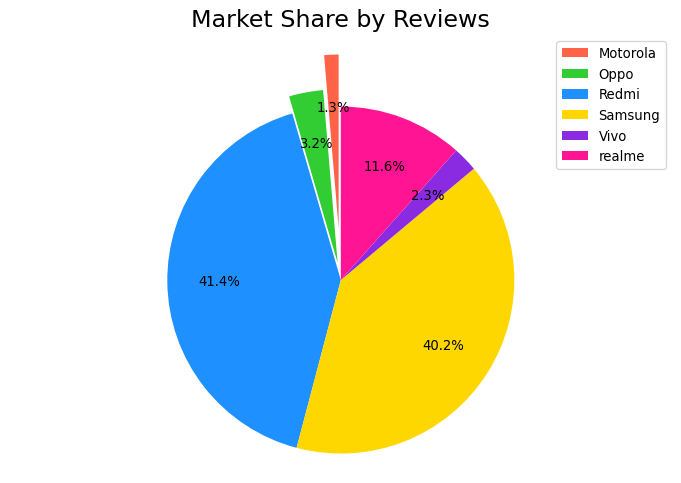

In [210]:
# Total reviews per brand
reviews_per_brand = mobile_DF.groupby('Brand')['Reviews'].sum()

# Ajusting figure size and pixles
plt.figure(figsize=(9, 6), dpi=95)

# Custom colors of each slice
custom_colors = ['#FF6347', '#32CD32', '#1E90FF', '#FFD700', '#8A2BE2', '#FF1493']

# Pie Chart
plt.pie(
    reviews_per_brand,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_colors,
    explode=(0.3, 0.1, 0, 0, 0, 0),
    pctdistance=0.7 
)

# Round Pie Chart (not oval)
plt.axis("equal")

# Title
plt.title("Market Share by Reviews", fontsize=18)

# Legend
plt.legend(labels=reviews_per_brand.index)

# Remove 'Reviews' from y axis
plt.ylabel('')

# Show the plot
plt.show()

#### 1) Redmi and Samsung are the top contenders in the market, as evidenced by their higher number of reviews, reflecting a strong customer base and widespread popularity.

#### 2) Redmi holds a slight edge over Samsung, leading by just 1.2% in reviews.

#### 3) Realme is gaining traction but still lags behind the top two, capturing only 11.6% of the market share.

#### 4) Oppo, Vivo, and Motorola have a significantly smaller market presence, with Motorola trailing far behind the others, indicating lower consumer interest.

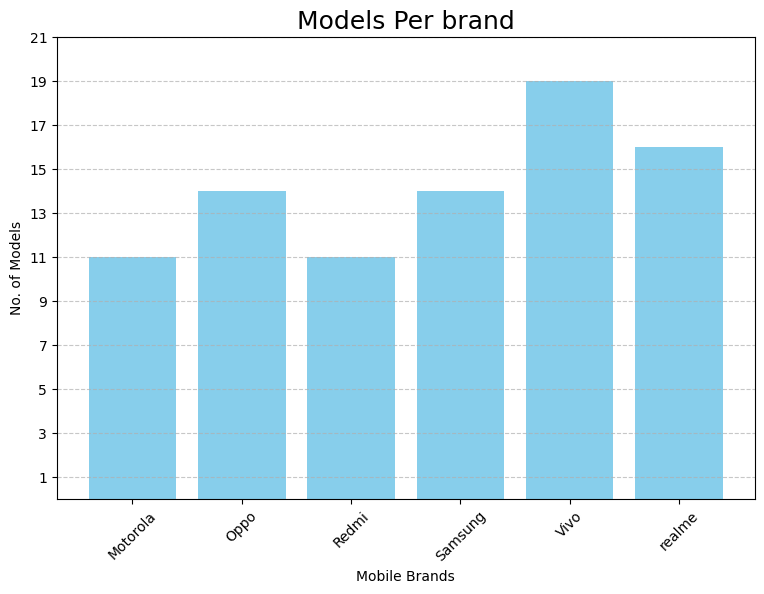

In [266]:
# Total Models per brand
brand_count = mobile_DF.groupby("Brand")["Model Name"].count()

# Adjust figure size
plt.figure(figsize=(9, 6))

# Bar Graph
plt.bar(brand_count.index, brand_count, color='skyblue')

# Title
plt.title("Models Per brand", fontsize=18)

# Names of x, y axis
plt.xlabel("Mobile Brands")
plt.ylabel("No. of Models")

# Customising x, y axis values
plt.xticks(rotation=45)
plt.yticks(np.arange(1, 22, 2))

# Add grids in bar graph at y axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### 1) Vivo and Realme offer more models than other brands, but they still lag behind in market share.

#### 2) Vivo has the highest number of models but remains in the second-last position in the market.

#### 3) Samsung and Oppo have the same number of models, but Samsung maintains very high market share than Oppo

#### 4) Motorola has a similar number of models to Redmi, yet it occupies the last position in market share.

#### 5) Redmi has less models than Samsung, but holds a slightly higher market share.

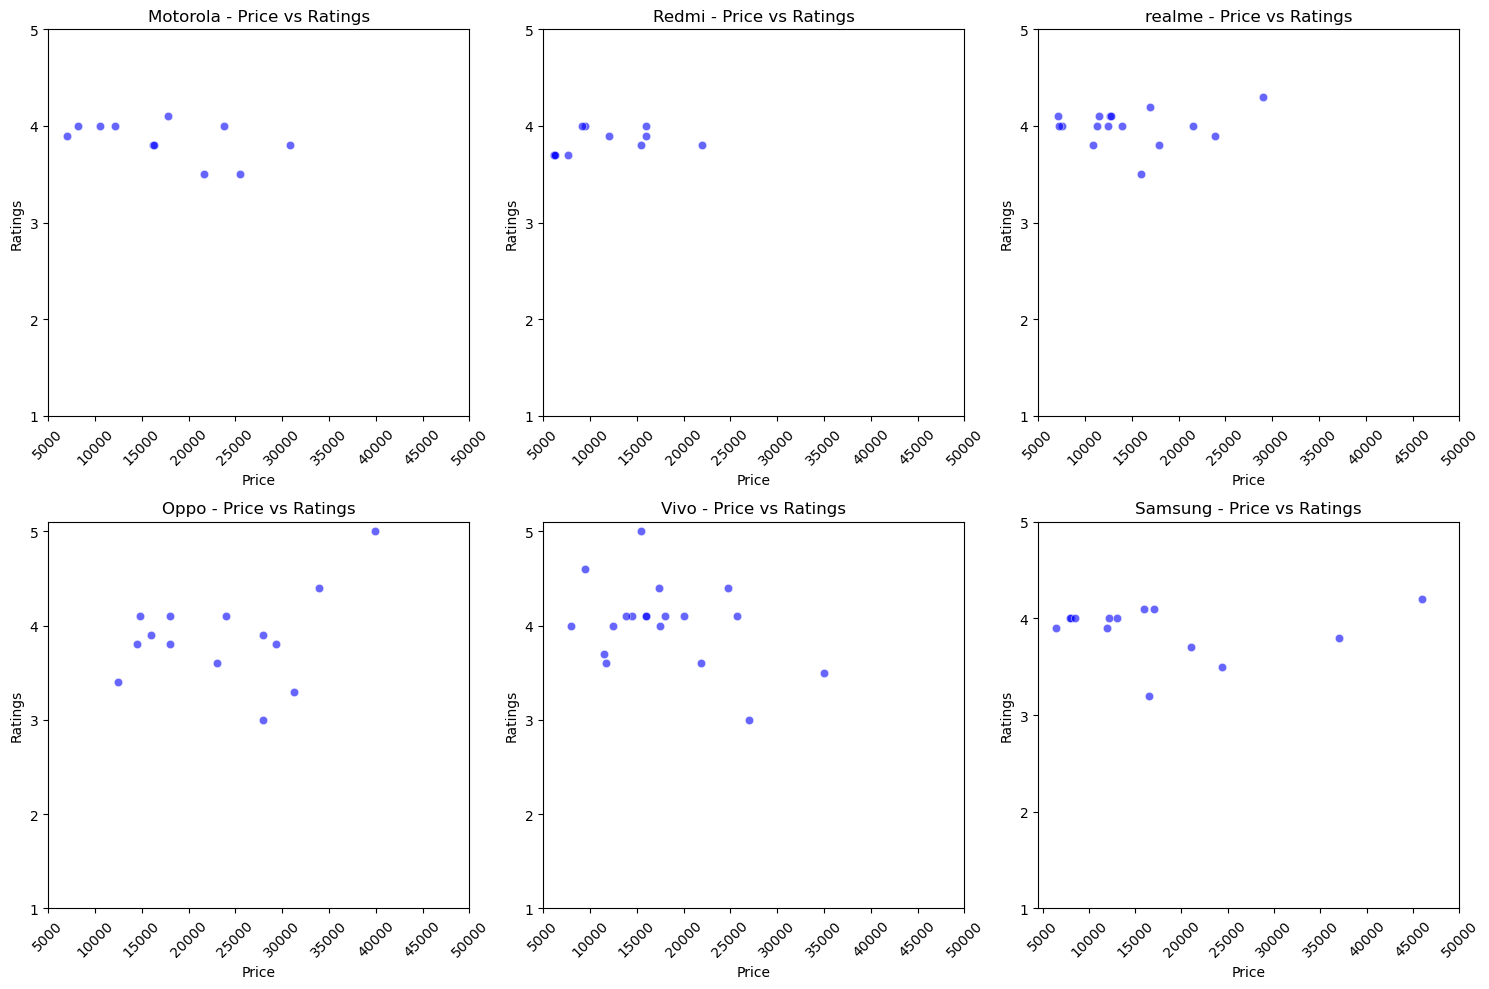

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique brands
brands = mobile_DF['Brand'].unique()

# Create subplots with consistent layout for each brand
fig, axes = plt.subplots(nrows=(len(brands) + 2)//3, ncols=3, figsize=(15, 5 * ((len(brands) + 2)//3)))

# Flatten axes for easier iteration
axes = axes.flatten()

# Define common x and y ticks
x_ticks = np.arange(5000, 55000, 5000)
y_ticks = np.arange(1, 6)

# Plot for each brand
for i, brand in enumerate(brands):
    sns.scatterplot(data=mobile_DF[mobile_DF['Brand'] == brand], x='Price', y='Ratings', ax=axes[i], color='blue', alpha=0.6)
    axes[i].set_title(f"{brand} - Price vs Ratings")
    axes[i].set_xticks(x_ticks)
    axes[i].set_yticks(y_ticks)
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

plt.show()

## 1) Motorola:
#### Primarily offers mobiles in the price range of 5k to 35k, with a wide distribution across this range.
#### Ratings typically do not exceed 4, indicating room for improvement in customer satisfaction, while they ***can work on their models***

## 2) Redmi:
#### Focuses mainly on mid-range mobiles priced between ***5k and 15k***, which are highly affordable.
#### The concentration of mobiles in this price range leads to a larger customer base.
#### Many of their models have ratings of 4 and above, reflecting good customer satisfaction.

## 3) Realme
#### Offers a mix of mid-range and flagship mobiles.
#### Good ratings (4 and above) for most models, demonstrating positive customer feedback.
#### Competes well with Redmi in the mid-range segment but still lacks in market share because of less reviews. ***(may be specs can be the reason)***

## 4) Oppo:
#### The price range starts from 10k, indicating ***they offer more premium models.***
#### Due to the higher price point, fewer reviews are observed. (Mostly Indians prefer value for money models)
#### However, some models receive good ratings of 4 and above, suggesting that certain premium models are well-received.

## 5) Vivo:
#### Models above 25k are low-rated, but models in the 15k-25k range receive good reviews (4+).
#### ***Vivo also relies on premium segments,*** which may limit its broader appeal
#### Despite good ratings, Vivo’s narrow focus on premium models and lower review volume contributed to its limited market share.

## 6) Samsung:
#### Mid-range Models: Ratings are around 4, showing decent satisfaction, though some models have lower ratings.
#### Flagship Models: Receive ratings of 4 and above, indicating ***strong performance and high customer satisfaction in the premium segment.***

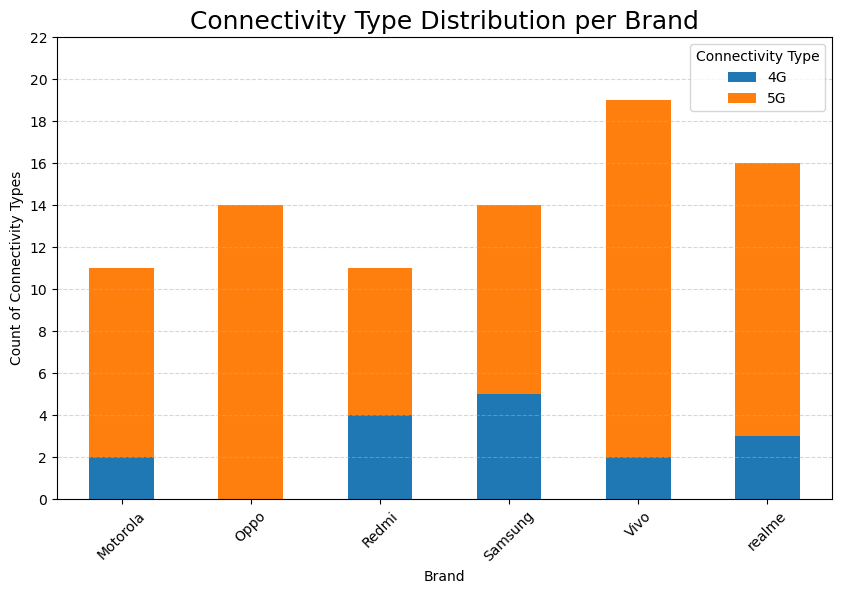

In [94]:
# Group by brand and count the occurrences of each connectivity type
connectivity_count_per_brand = mobile_DF.groupby("Brand")["Connectivity"].value_counts()

# Plot the counts
connectivity_count_per_brand.unstack().plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title("Connectivity Type Distribution per Brand", fontsize=18)

plt.xlabel("Brand")
plt.ylabel("Count of Connectivity Types")

plt.xticks(rotation=45)
plt.yticks(np.arange(0, 23, 2))

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.legend(title="Connectivity Type")

plt.show()

#### 1) 5G is growing fast because it has better features and speed.
#### 2) 4G is still popular, especially for budget-friendly phones where price matters more.
#### 3) Redmi and Samsung are popular because they offer affordable 4G phones that attract price-conscious buyers.
#### 4) 5G is becoming more common, but many people still care more about affordability, which makes 4G phones from Redmi and Samsung a popular choice.

In [6]:
# Adding a 'Price_Category' column to categorize prices
def price_category(price):
    if price <= 10000:
        return 'Budget'
    elif price <= 20000:
        return 'Mid Range'
    else:
        return 'Flagship'

mobile_DF['Price_Category'] = mobile_DF['Price'].apply(price_category)

# Grouping by both 'Brand' and 'Price_Category'
result = mobile_DF.groupby(['Brand', 'Price_Category']).size()
print(result)

Brand     Price_Category
Motorola  Budget             2
          Flagship           4
          Mid Range          5
Oppo      Flagship           8
          Mid Range          6
Redmi     Budget             6
          Flagship           1
          Mid Range          4
Samsung   Budget             4
          Flagship           4
          Mid Range          6
Vivo      Budget             2
          Flagship           5
          Mid Range         12
realme    Budget             3
          Flagship           3
          Mid Range         10
dtype: int64


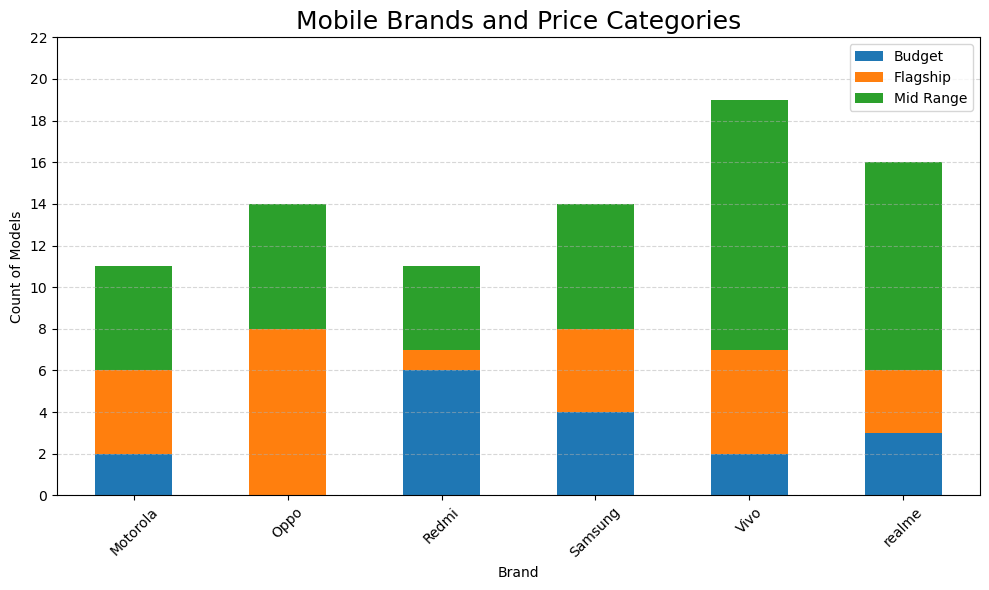

In [105]:
# Grouping by 'Brand' and 'Price_Category'
grouped_data = mobile_DF.groupby(['Brand', 'Price_Category']).size()

# Unstacking to make it suitable for a stacked bar chart
grouped_data_unstacked = grouped_data.unstack()

# Plotting the stacked bar chart
grouped_data_unstacked.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Mobile Brands and Price Categories', fontsize=18)

plt.xlabel('Brand')
plt.ylabel('Count of Models')

plt.xticks(rotation=45)
plt.yticks(np.arange(0, 23, 2))

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### 1) Redmi mainly focuses on budget mobiles, which is the primary reason for their high market share.
#### 2) Samsung offers a balanced range across all categories: budget, mid-range, and flagship, which strengthens their position in the market.
#### 3) Oppo shows a strong interest in flagship phones, with some presence in the mid-range category.
#### 4) Vivo focuses less on budget mobiles but offers a significant number of mid-range phones, alongside a considerable range of flagship mobiles.
#### 5) Realme is performing well in the market with a focus on mid-range mobiles, although they lag behind Samsung and Redmi, especially in the budget category.
#### 6) Despite these trends, consumers seem to prefer value-for-money mobiles rather than opting for flagship models.